In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
from collections import Counter

# --- Kaggle dataset paths ---
train_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'
test_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'
val_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/val'

def get_class_counts(data_dir):
    """Calculates the number of NORMAL and PNEUMONIA images in a directory."""
    normal_count = len(os.listdir(os.path.join(data_dir, 'NORMAL')))
    pneumonia_count = len(os.listdir(os.path.join(data_dir, 'PNEUMONIA')))
    total = normal_count + pneumonia_count
    return normal_count, pneumonia_count, total

print("--- Data Distribution and Counts ---")

# TRAIN set analysis
tn, tp, tt = get_class_counts(train_dir)
print(f"TRAIN: Normal={tn}, Pneumonia={tp}, Total={tt}")
train_ratio = round(tp / tn, 2)
print(f"TRAIN Imbalance Ratio (Pneumonia:Normal): {train_ratio}:1\n")

# TEST set analysis
tsn, tsp, tst = get_class_counts(test_dir)
print(f"TEST: Normal={tsn}, Pneumonia={tsp}, Total={tst}")
test_ratio = round(tsp / tsn, 2)
print(f"TEST Imbalance Ratio (Pneumonia:Normal): {test_ratio}:1\n")

# VAL set analysis
vn, vp, vt = get_class_counts(val_dir)
print(f"VAL: Normal={vn}, Pneumonia={vp}, Total={vt}")
val_ratio = round(vp / vn, 2)
print(f"VAL Imbalance Ratio (Pneumonia:Normal): {val_ratio}:1\n")

--- Data Distribution and Counts ---
TRAIN: Normal=1341, Pneumonia=3875, Total=5216
TRAIN Imbalance Ratio (Pneumonia:Normal): 2.89:1

TEST: Normal=234, Pneumonia=390, Total=624
TEST Imbalance Ratio (Pneumonia:Normal): 1.67:1

VAL: Normal=8, Pneumonia=8, Total=16
VAL Imbalance Ratio (Pneumonia:Normal): 1.0:1



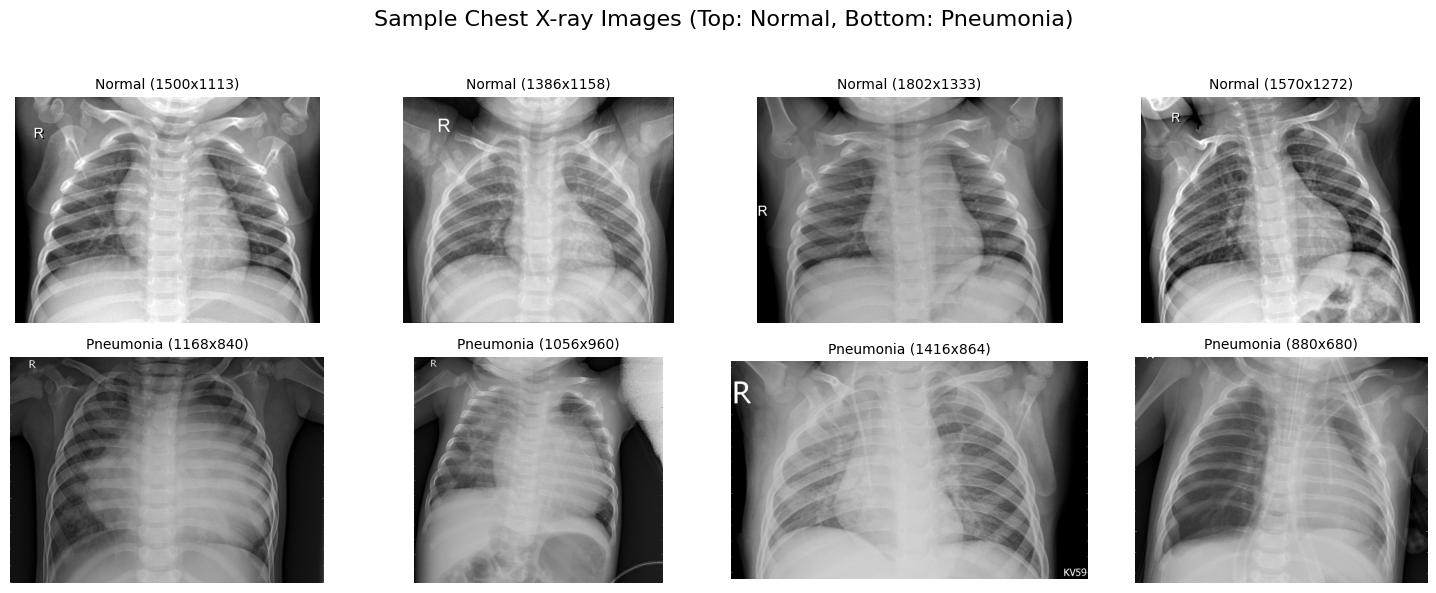

In [2]:
# Get a list of 4 random images for each class
normal_samples = np.random.choice(glob(os.path.join(train_dir, 'NORMAL', '*')), 4)
pneumonia_samples = np.random.choice(glob(os.path.join(train_dir, 'PNEUMONIA', '*')), 4)

fig, axes = plt.subplots(2, 4, figsize=(15, 6))
fig.suptitle('Sample Chest X-ray Images (Top: Normal, Bottom: Pneumonia)', fontsize=16)

# Plot Normal samples
for i, path in enumerate(normal_samples):
    img = Image.open(path).convert('L') # Convert to Grayscale for display consistency
    axes[0, i].imshow(img, cmap='gray')
    axes[0, i].set_title(f"Normal ({img.size[0]}x{img.size[1]})", fontsize=10)
    axes[0, i].axis('off')

# Plot Pneumonia samples
for i, path in enumerate(pneumonia_samples):
    img = Image.open(path).convert('L') # Convert to Grayscale for display consistency
    axes[1, i].imshow(img, cmap='gray')
    axes[1, i].set_title(f"Pneumonia ({img.size[0]}x{img.size[1]})", fontsize=10)
    axes[1, i].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
